In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/sarah/ML/master_thesis/Datasets/shuffled_data.csv")# Load mapping and clinical data
id_map = pd.read_csv("/Users/sarah/ML/master_thesis/Datasets/patient_id_mapping.csv")
id_map.columns = ['Anon.Patient_ID', 'study_id']
clinical = pd.read_excel("/Users/sarah/Library/Mobile Documents/iCloud~md~obsidian/Documents/MSc Medizininformatik/Master Thesis/Data/219 patients.xlsx")

# Merge measurement data with mapping
df_with_id = df.merge(id_map, on="Anon.Patient_ID", how="left")

# Merge with clinical data
df_full = df_with_id.merge(clinical, left_on="study_id", right_on="study_id", how="left")

output_folder = "/Users/sarah/Library/Mobile Documents/iCloud~md~obsidian/Documents/MSc Medizininformatik/Master Thesis/Writing/Plots"


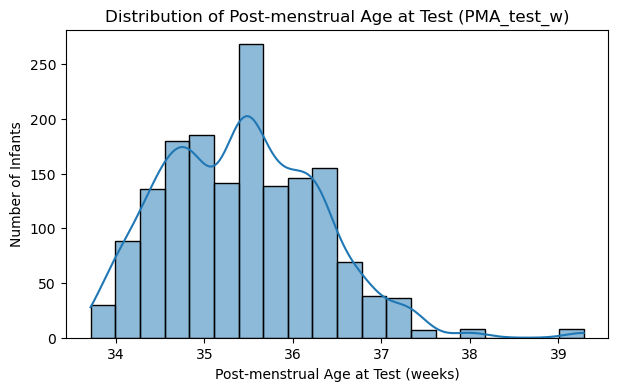

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(df_full['PMA_test_w'], bins=20, kde=True)
plt.title("Distribution of Post-menstrual Age at Test (PMA_test_w)")
plt.xlabel("Post-menstrual Age at Test (weeks)")
plt.ylabel("Number of Infants")
plt.savefig(f"{output_folder}/hist_PMA_test_w.png", dpi=300, bbox_inches="tight")
plt.show()


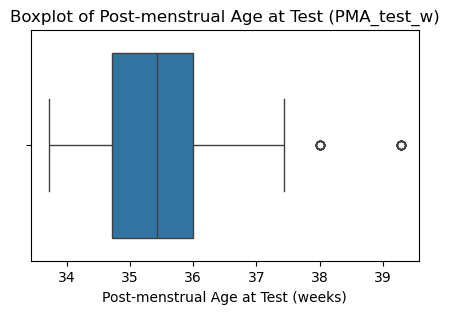

In [3]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df_full['PMA_test_w'])
plt.title("Boxplot of Post-menstrual Age at Test (PMA_test_w)")
plt.xlabel("Post-menstrual Age at Test (weeks)")
# plt.savefig(f"{output_folder}/boxplot_PMA_test_w.png", dpi=300, bbox_inches="tight")
plt.show()


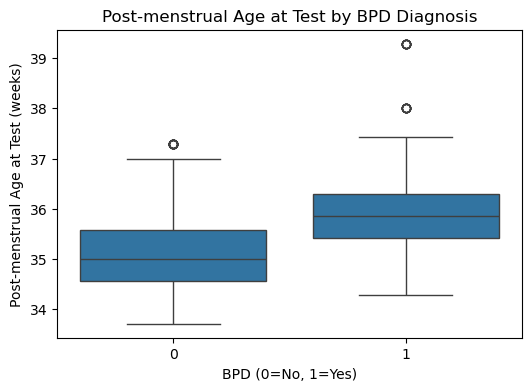

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x='BPD_yn', y='PMA_test_w', data=df_full)
plt.title("Post-menstrual Age at Test by BPD Diagnosis")
plt.xlabel("BPD (0=No, 1=Yes)")
plt.ylabel("Post-menstrual Age at Test (weeks)")
# plt.savefig(f"{output_folder}/boxplot_PMA_test_w_by_BPD.png", dpi=300, bbox_inches="tight")
plt.show()


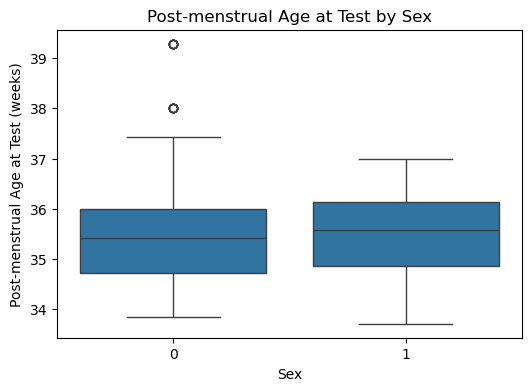

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='PMA_test_w', data=df_full)
plt.title("Post-menstrual Age at Test by Sex")
plt.xlabel("Sex")
plt.ylabel("Post-menstrual Age at Test (weeks)")
# plt.savefig(f"{output_folder}/boxplot_PMA_test_w_by_Sex.png", dpi=300, bbox_inches="tight")
plt.show()


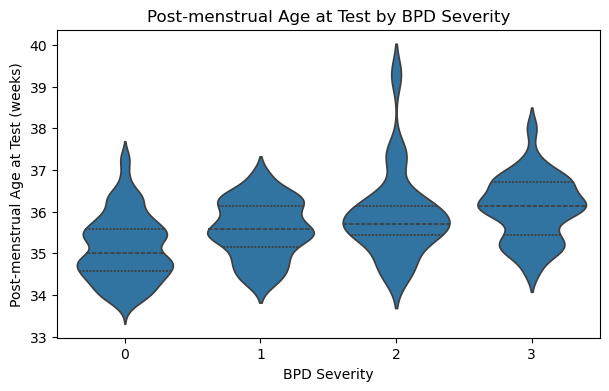

In [7]:
plt.figure(figsize=(7,4))
sns.violinplot(x='BPD_severity', y='PMA_test_w', data=df_full, inner='quartile')
plt.title("Post-menstrual Age at Test by BPD Severity")
plt.xlabel("BPD Severity")
plt.ylabel("Post-menstrual Age at Test (weeks)")
# plt.savefig(f"{output_folder}/violin_PMA_test_w_by_BPD_severity.png", dpi=300, bbox_inches="tight")
plt.show()


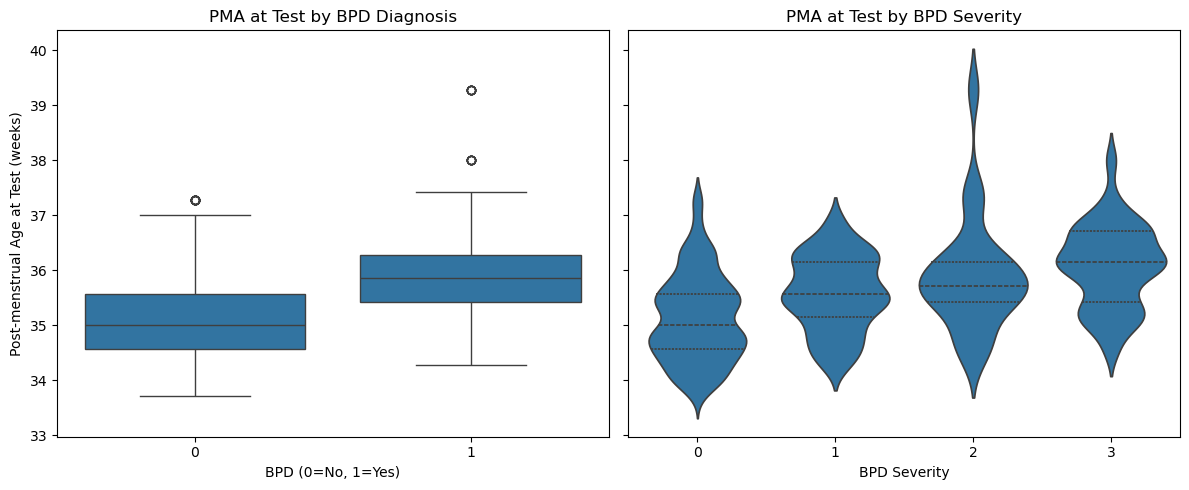

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Boxplot for BPD diagnosis (left)
sns.boxplot(ax=axes[0], x='BPD_yn', y='PMA_test_w', data=df_full)
axes[0].set_title("PMA at Test by BPD Diagnosis")
axes[0].set_xlabel("BPD (0=No, 1=Yes)")
axes[0].set_ylabel("Post-menstrual Age at Test (weeks)")

# Violinplot for BPD severity (right)
sns.violinplot(ax=axes[1], x='BPD_severity', y='PMA_test_w', data=df_full, inner='quartile')
axes[1].set_title("PMA at Test by BPD Severity")
axes[1].set_xlabel("BPD Severity")
axes[1].set_ylabel("")  # No y-label on the right

plt.tight_layout()
plt.savefig(f"{output_folder}/PMA_test_w_BPD_diag_box_and_severity_violin.png", dpi=300, bbox_inches="tight")
plt.show()


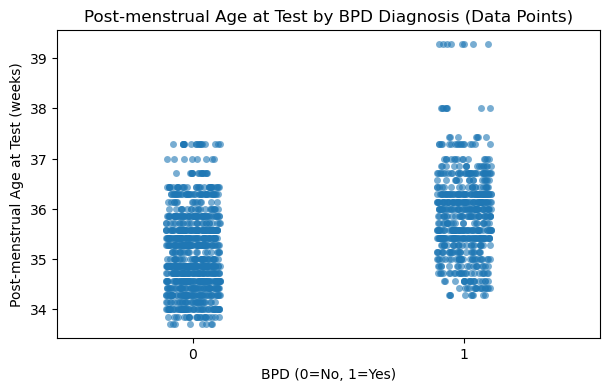

In [8]:
plt.figure(figsize=(7,4))
sns.stripplot(x='BPD_yn', y='PMA_test_w', data=df_full, jitter=True, alpha=0.6)
plt.title("Post-menstrual Age at Test by BPD Diagnosis (Data Points)")
plt.xlabel("BPD (0=No, 1=Yes)")
plt.ylabel("Post-menstrual Age at Test (weeks)")
# plt.savefig(f"{output_folder}/stripplot_PMA_test_w_by_BPD.png", dpi=300, bbox_inches="tight")
plt.show()


In [9]:
pma = df_full['PMA_test_w'].dropna()

print("Summary statistics for Post-menstrual Age at Test (PMA_test_w):")
print(f"Count:     {pma.count()}")
print(f"Mean:      {pma.mean():.2f}")
print(f"Std dev:   {pma.std():.2f}")
print(f"Median:    {pma.median():.2f}")
print(f"Mode:      {pma.mode().values[0] if not pma.mode().empty else 'n/a'}")
print(f"Min:       {pma.min():.2f}")
print(f"Max:       {pma.max():.2f}")
print(f"Range:     {pma.min():.2f} - {pma.max():.2f}")
print(f"25th pct:  {pma.quantile(0.25):.2f}")
print(f"75th pct:  {pma.quantile(0.75):.2f}")
print(f"IQR:       {pma.quantile(0.75) - pma.quantile(0.25):.2f}")
print(f"Skewness:  {pma.skew():.2f}")
print(f"Kurtosis:  {pma.kurtosis():.2f}")


Summary statistics for Post-menstrual Age at Test (PMA_test_w):
Count:     1634
Mean:      35.43
Std dev:   0.89
Median:    35.43
Mode:      35.57142857142857
Min:       33.71
Max:       39.29
Range:     33.71 - 39.29
25th pct:  34.71
75th pct:  36.00
IQR:       1.29
Skewness:  0.57
Kurtosis:  0.81


In [15]:
from scipy.stats import mannwhitneyu, kruskal

# Mann-Whitney U test: PMA_test_w by BPD diagnosis
group0 = df_full[df_full['BPD_yn'] == 0]['PMA_test_w'].dropna()
group1 = df_full[df_full['BPD_yn'] == 1]['PMA_test_w'].dropna()

u_stat, u_p = mannwhitneyu(group0, group1, alternative='two-sided')
print(f"Mann-Whitney U test for BPD diagnosis: U={u_stat:.2f}, p-value={u_p:.4f}")

# Kruskal-Wallis test: PMA_test_w by BPD severity
severity_groups = [g['PMA_test_w'].dropna() for name, g in df_full.groupby('BPD_severity')]
k_stat, k_p = kruskal(*severity_groups)
print(f"Kruskal-Wallis test for BPD severity: H={k_stat:.2f}, p-value={k_p:.4f}")


Mann-Whitney U test for BPD diagnosis: U=167131.00, p-value=0.0000
Kruskal-Wallis test for BPD severity: H=301.44, p-value=0.0000


In [16]:
from scipy.stats import mannwhitneyu, kruskal
import pandas as pd

# Subset: only severity 1, 2, 3
subset = df_full[df_full['BPD_severity'].isin([1,2,3])]

# Groups
g1 = subset[subset['BPD_severity'] == 1]['PMA_test_w'].dropna()
g2 = subset[subset['BPD_severity'] == 2]['PMA_test_w'].dropna()
g3 = subset[subset['BPD_severity'] == 3]['PMA_test_w'].dropna()

# Kruskal-Wallis
k_stat, k_p = kruskal(g1, g2, g3)
print(f"Kruskal-Wallis test (severity 1,2,3): H={k_stat:.2f}, p-value={k_p:.4f}")

# Post-hoc pairwise Mann-Whitney U tests
pairs = [(g1, g2, "1 vs 2"), (g1, g3, "1 vs 3"), (g2, g3, "2 vs 3")]
results = []
for grp_a, grp_b, label in pairs:
    u_stat, u_p = mannwhitneyu(grp_a, grp_b, alternative='two-sided')
    results.append({'Comparison': label, 'U': u_stat, 'p-value (uncorrected)': u_p})

# Optional: Bonferroni correction
n_tests = len(results)
for res in results:
    res['p-value (Bonferroni)'] = min(res['p-value (uncorrected)'] * n_tests, 1.0)

# Display results as a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


Kruskal-Wallis test (severity 1,2,3): H=42.15, p-value=0.0000
  Comparison        U  p-value (uncorrected)  p-value (Bonferroni)
0     1 vs 2  15782.5           9.592795e-03          2.877839e-02
1     1 vs 3  18805.0           1.044879e-10          3.134637e-10
2     2 vs 3  18857.5           8.136510e-04          2.440953e-03
